In [1]:
from src.Distributions import *
import math
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import os  
# import glob
# from collections import Counter
# from collections import OrderedDict
# import gzip
# from scipy import stats
# from sklearn.linear_model import LinearRegression
# from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# from sklearn.model_selection import train_test_split
import shutil

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [2]:
make_results_folders()

In [52]:
# N = 10**5
# dim = [1,2,3,4]

# set_par_1 = list_all_folders(N,1)
# set_par_2 = list_all_folders(N,2)
# set_par_3 = list_all_folders(N,3)
# set_par_4 = list_all_folders(N,4)

In [53]:
# for i in range(len(set_par_1)):
#     print(f"i = {i}, alpha_a = {set_par_1[i][0]},alpha_g={set_par_1[i][1]}")
#     create_all_distributions(N,1,set_par_1[i][0],set_par_1[i][1])
# for i in range(len(set_par_2)):
#     print(f"alpha_a = {set_par_2[i][0]},alpha_g={set_par_2[i][1]}")
#     create_all_distributions(N,2,set_par_2[i][0],set_par_2[i][1])
# for i in range(len(set_par_3)):
#     print(f"alpha_a = {set_par_3[i][0]},alpha_g={set_par_3[i][1]}")
#     create_all_distributions(N,3,set_par_3[i][0],set_par_3[i][1])
# for i in range(len(set_par_4)):
#     print(f"alpha_a = {set_par_4[i][0]},alpha_g={set_par_4[i][1]}")
#     create_all_distributions(N,4,set_par_4[i][0],set_par_4[i][1])

In [2]:
N = 10**5
dim = [1,2,3,4]

# Pack one
alpha_a_f = 2.0
alpha_g_v = [1.0, 2.0, 3.0, 4.0, 5.0]
#----------------------------------------------------------
# Pack two
alpha_g_f = 2.0
#alpha_a_v = [0.0, 1.5, 2.0, 2.5, 3.0, 3.5, 5.0, 6.0, 8.0, 5.0, 6.0, 8.0]
alpha_a_v = [0.0, 1.0 ,2.0, 3.0, 4.0, 5.0, 6.0, 8.0]
#----------------------------------------------------------

In [95]:
alpha_dim = []

for j in alpha_a_v:        
    path = f"../../data/N_{N}/dim_{1}/alpha_a_{j}_alpha_g_{alpha_g_f}/gml"
    all_files = glob.glob(os.path.join(path,"*.gml.gz"))
    alpha_dim.append(len(all_files))
    

In [96]:
alpha_dim

[258, 159, 438, 359, 158, 359, 359, 361]

In [3]:
for i in dim:
    for j in alpha_g_v:
        all_degree_GML(N,i,alpha_a_f,j)
    for k in alpha_a_v:
        all_degree_GML(N,i,k,alpha_g_f)

In [4]:
k_1d_g, pk_1d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_2d_g, pk_2d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_3d_g, pk_3d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]
k_4d_g, pk_4d_g = [[] for _ in range(len(alpha_g_v))],[[] for _ in range(len(alpha_g_v))]

In [72]:
# If save_arg = True, the distribution will be saved in a file
save_arg = False

for i in range(len(alpha_g_v)):
    if(save_arg == False):
        k_1d_g[i], pk_1d_g[i] = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["pk"].values
        k_2d_g[i], pk_2d_g[i] = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["pk"].values
        k_3d_g[i], pk_3d_g[i] = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["pk"].values
        k_4d_g[i], pk_4d_g[i] = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_f}_alpha_g_{alpha_g_v[i]}/all_files/distri_linear_all.csv")["pk"].values
    else:
        degree1d = reader_degree_all(N, 1, alpha_a_f, alpha_g_v[i])
        degree2d = reader_degree_all(N, 2, alpha_a_f, alpha_g_v[i])
        degree3d = reader_degree_all(N, 3, alpha_a_f, alpha_g_v[i])
        degree4d = reader_degree_all(N, 4, alpha_a_f, alpha_g_v[i])
        k_1d_g[i], pk_1d_g[i] = distribution(N, 1, alpha_a_f, alpha_g_v[i], degree1d, save = save_arg)
        k_2d_g[i], pk_2d_g[i] = distribution(N, 2, alpha_a_f, alpha_g_v[i], degree2d, save = save_arg)
        k_3d_g[i], pk_3d_g[i] = distribution(N, 3, alpha_a_f, alpha_g_v[i], degree3d, save = save_arg)
        k_4d_g[i], pk_4d_g[i] = distribution(N, 4, alpha_a_f, alpha_g_v[i], degree4d, save = save_arg)

        log_binning(N, 1,alpha_a_f, alpha_g_v[i], Counter(degree1d), 80, save = save_arg)
        log_binning(N, 2,alpha_a_f, alpha_g_v[i], Counter(degree2d), 80, save = save_arg)
        log_binning(N, 3,alpha_a_f, alpha_g_v[i], Counter(degree3d), 80, save = save_arg)
        log_binning(N, 4,alpha_a_f, alpha_g_v[i], Counter(degree4d), 80, save = save_arg)

In [5]:
k_1d_a, pk_1d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_2d_a, pk_2d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_3d_a, pk_3d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]
k_4d_a, pk_4d_a = [[] for _ in range(len(alpha_a_v))],[[] for _ in range(len(alpha_a_v))]

In [6]:
# If save_arg = True: the distribution will be saved in a file
# Else: read tuple values (k, pk)
save_arg = False
log_bin = True

for i in range(len(alpha_a_v)):
    if(save_arg == False and log_bin == False):
            k_1d_a[i], pk_1d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["pk"].values
            k_2d_a[i], pk_2d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["pk"].values
            k_3d_a[i], pk_3d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["pk"].values
            k_4d_a[i], pk_4d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_linear_all.csv")["pk"].values
    elif(save_arg == False and log_bin == True):
            k_1d_a[i], pk_1d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_1/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["pk"].values
            k_2d_a[i], pk_2d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_2/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["pk"].values
            k_3d_a[i], pk_3d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_3/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["pk"].values
            k_4d_a[i], pk_4d_a[i] = pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["k"].values,pd.read_csv(f"../../data/N_{N}/dim_4/alpha_a_{alpha_a_v[i]}_alpha_g_{alpha_g_f}/all_files/distri_log_all.csv")["pk"].values
    else:
        degree1d = reader_degree_all(N, 1, alpha_a_v[i], alpha_g_f)
        degree2d = reader_degree_all(N, 2, alpha_a_v[i], alpha_g_f)
        degree3d = reader_degree_all(N, 3, alpha_a_v[i], alpha_g_f)
        degree4d = reader_degree_all(N, 4, alpha_a_v[i], alpha_g_f)
        
        k_1d_a[i], pk_1d_a[i] = distribution(N, 1, alpha_a_v[i], alpha_g_f, degree1d, save = save_arg)
        k_2d_a[i], pk_2d_a[i] = distribution(N, 2, alpha_a_v[i], alpha_g_f, degree2d, save = save_arg)
        k_3d_a[i], pk_3d_a[i] = distribution(N, 3, alpha_a_v[i], alpha_g_f, degree3d, save = save_arg)
        k_4d_a[i], pk_4d_a[i] = distribution(N, 4, alpha_a_v[i], alpha_g_f, degree4d, save = save_arg)
        
        log_binning(N, 1,alpha_a_v[i], alpha_g_f, Counter(degree1d), 80, save = save_arg)
        log_binning(N, 2,alpha_a_v[i], alpha_g_f, Counter(degree2d), 80, save = save_arg)
        log_binning(N, 3,alpha_a_v[i], alpha_g_f, Counter(degree3d), 80, save = save_arg)
        log_binning(N, 4,alpha_a_v[i], alpha_g_f, Counter(degree4d), 80, save = save_arg)

In [9]:
def find_order_of_magnitude(number):
    order = int(math.floor(math.log10(abs(number))))
    return abs(order)    

In [10]:
def normalized_constant(x, q, kappa):
    distribution_list = []
    
    for i in x:
        term = [1 - (1 - q) * ( i / kappa)]**(1 / (1 - q))
        distribution_list.append(term)
    A = 1 / sum(distribution_list)
    
    return A


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import kstest

def find_order_of_magnitude(number):
    order = int(math.floor(math.log10(abs(number))))
    return abs(order)    

def q(alpha_a,d):
    if(0 <= alpha_a/d <= 1):
        return 4/3
    else:
        return round((1/3)*np.exp(1-alpha_a/d)+1.0,4)

def lambda_(alpha_a,d):
    if(0 <= alpha_a/d <= 1):
        return 0.3
    else:
        return round(-1.15*np.exp(1-alpha_a/d)+1.45,4)
    
def normalized_constant(x, q, b):
    distribution_list = []
    
    for i in range(len(x)):
        term = (1 - (1 - q) * ( x[i] / b ))**(1 / ( 1 - q ) )

        #if not np.isfinite(term):
            #term = 0.0  # or any other value that makes sense in your context
        
        distribution_list.append(term)
    
    A = 1 / sum(distribution_list)
    
    return A

def q_exp(x, q, b):
    A = normalized_constant(x, q, b)
    
    real_distri = []
    for i in range(len(x)):
        term = A * (1 - ( 1 - q ) * ( x[i] / b ) )**(1 / ( 1 - q ))
                # Check for division by zero
        #if not np.isfinite(term):
            #aterm = 0.0  # or any other value that makes sense in your context
            
        real_distri.append(term)

    return real_distri
# k: independent variable, pk: distribution of k
k, pk = distributions["k"].values, distributions["pk"].values

# Set parameters for the q-exponential distribution (initial parameter)
q_parameter = 1.33
b_parameter = 0.3

# Create a model using the custom q-exponential function (changer with your distribution)
model = Model(q_exp)

# Set initial parameter values
params = model.make_params(q=q_parameter, b=b_parameter)

params['q'].max = 4/3  # Set the maximum bound for q
params['q'].min = 1.01  # Set the maximum bound for q

params['b'].min = 0.03  # Set the minimum bound for b
params['b'].max = 1.45  # Set the maximum bound for b (use np.inf for infinity)


# Fit the model to the truncated data
result = model.fit(pk, params, x=k)

# Get the fitted parameters (best parameters)
fitted_q = result.params['q'].value
fitted_b = result.params['b'].value

#Perform KS test on the fitted q-exponential distribution using the CDF
ks_statistic, ks_p_value = kstest(pk, q_exp(k, fitted_q, fitted_b))
# ks_p_values its similiar to R

[1.0,
 0.9999999310621962,
 0.999999734559995,
 1.0,
 0.999999734559995,
 0.9999999999999998,
 1.0,
 1.0]

In [14]:
def teste(x,x0,A,B, C):
    func = []
    for i in x:
        if(i < x0):
            func.append(A - B/((i-x0)**2+1))
        elif(i >= x0):
            func.append(A + C*(i-x0)**2)
    return func
            

In [18]:
def a(x,x0):
    func = []
    for i in x:
        func.append(5 - 2/((i-x0)**2+1))
    return func

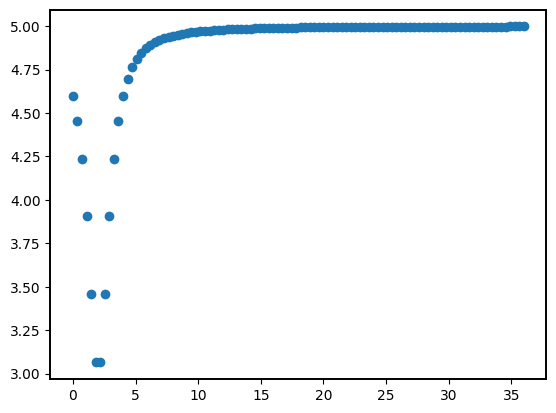

In [19]:
plt.plot(np.linspace(0,36,100),a(np.linspace(0,36,100),2),"o")
plt.show()

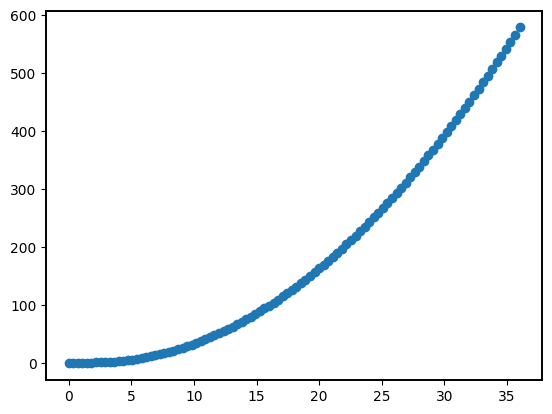

In [16]:
x = np.linspace(0,36,100)
x0 = 2
A, B, C = 1, 2, .5
t = teste(x,x0,A,B,C)
plt.plot(x,t,'o')
plt.show()

In [75]:
def normalized_constant(x, q, b):
    distribution_list = []
    
    for i in range(len(x)):
        term = (1 - (1 - q) * ( x[i] / b ))**(1 / (1 - q))

        #if not np.isfinite(term):
            #term = 0.0  # or any other value that makes sense in your context
        
        distribution_list.append(term)
    
    A = 1 / sum(distribution_list)
    
    return A

def q_exp(x, q, b):
    A = normalized_constant(x, q, b)
    
    real_distri = []
    for i in range(len(x)):
        term = A * (1 - ( 1 - q ) * ( x[i] / b ) )**(1 / ( 1 - q ))
                # Check for division by zero
        #if not np.isfinite(term):
            #aterm = 0.0  # or any other value that makes sense in your context
            
        real_distri.append(term)

    return real_distri

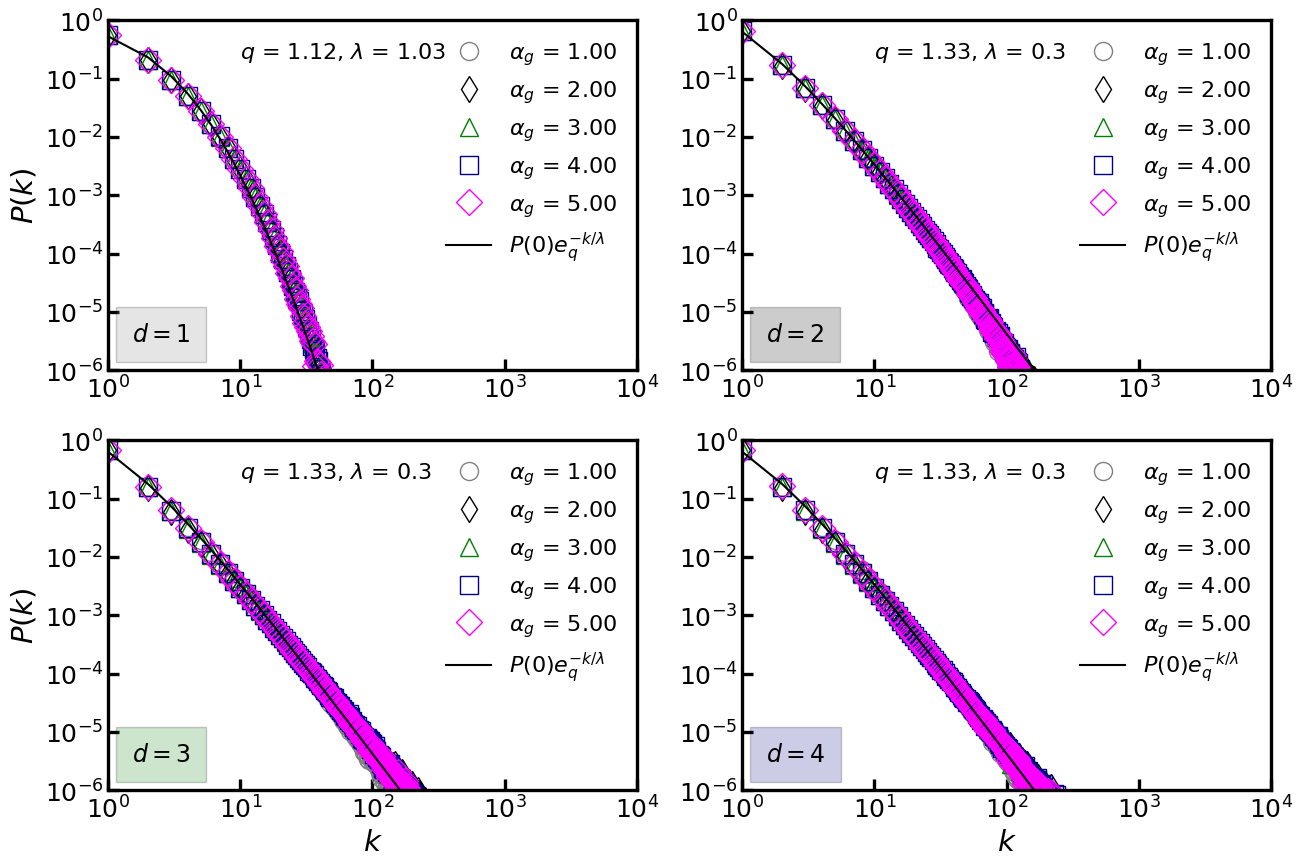

In [87]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod"]
# label1d = [rf"$\lambda$ = {lambda_1d[i]:.2f}, q = {q1d[i]:.2f}" for i in range(len(lambda_1d))]
# label2d = [rf"$\lambda$ = {lambda_2d[i]:.2f}, q = {q2d[i]:.2f}" for i in range(len(lambda_1d))]
# label3d = [rf"$\lambda$ = {lambda_3d[i]:.2f}, q = {q3d[i]:.2f}" for i in range(len(lambda_1d))]
# label4d = [rf"$\lambda$ = {lambda_4d[i]:.2f}, q = {q4d[i]:.2f}" for i in range(len(lambda_1d))]

labels_1 = [rf"$\alpha_g$ = {i:.2f}" for i in alpha_g_v]

markers = ["o","d","^","s","D"]
#markers = ["o","o","o","o","o"]
markersize = 13
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_g_v)):
     # Plot data
    ax[0, 0].plot(k_1d_g[i], pk_1d_g[i],markers[i],color=color[i],label=labels_1[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2d_g[i], pk_2d_g[i],markers[i],color=color[i],label=labels_1[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_3d_g[i], pk_3d_g[i],markers[i],color=color[i],label=labels_1[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_4d_g[i], pk_4d_g[i],markers[i],color=color[i],label=labels_1[i],markersize=markersize,markerfacecolor='none')

ax[0, 0].plot(k_1d_g[1],q_exp(k_1d_g[1], q(2.0, 1), kappa(2.0, 1)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")
ax[0, 1].plot(k_2d_g[1],q_exp(k_2d_g[1], q(2.0, 2), kappa(2.0, 2)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")
ax[1, 0].plot(k_3d_g[1],q_exp(k_3d_g[1], q(2.0, 3), kappa(2.0, 3)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")
ax[1, 1].plot(k_4d_g[1],q_exp(k_4d_g[1], q(2.0, 4), kappa(2.0, 4)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")

# Dimension Values
ax[0, 0].text(1.5, 10**(-5.5), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(1.5, 10**(-5.5), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(1.5, 10**(-5.5), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(1.5, 10**(-5.5), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

ax[0, 0].text(10, 10**(-.65), f'$q$ = {round(q(2.0, 1),2)}, $\lambda$ = {round(kappa(2.0, 1),2)}', style="normal" ,fontsize=16)
ax[0, 1].text(10, 10**(-.65), f'$q$ = {round(q(2.0, 2),2)}, $\lambda$ = {round(kappa(2.0, 2),2)}', style="normal" ,fontsize=16)
ax[1, 0].text(10, 10**(-.65), f'$q$ = {round(q(2.0, 3),2)}, $\lambda$ = {round(kappa(2.0, 3),2)}', style="normal" ,fontsize=16)
ax[1, 1].text(10, 10**(-.65), f'$q$ = {round(q(2.0, 4),2)}, $\lambda$ = {round(kappa(2.0, 4),2)}', style="normal" ,fontsize=16)
#ax[1, 1].text(230.5, 10**(-5.5), f'$q$ = {round(q(2.0, 4),2)}, $\lambda$ = {round(kappa(2.0, 4),2)}', style="normal" ,fontsize=16)

thickness_axes =  2.4
parts_of_graphic = ['top', 'bottom', 'left', 'right']
for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(k)$",size=21)
        ax[1, j].set_xlabel(r"$k$",size=21)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())
        #ax[i, j].tick_params('both', labelsize=21)
        #ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        ax[i,j].tick_params(which='major', width=thickness_axes,direction="in",length=8,labelsize=18)
#fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_g$', fontsize=30)
plt.savefig("../../results/distributions/alphag.pdf",dpi=300)
plt.show()

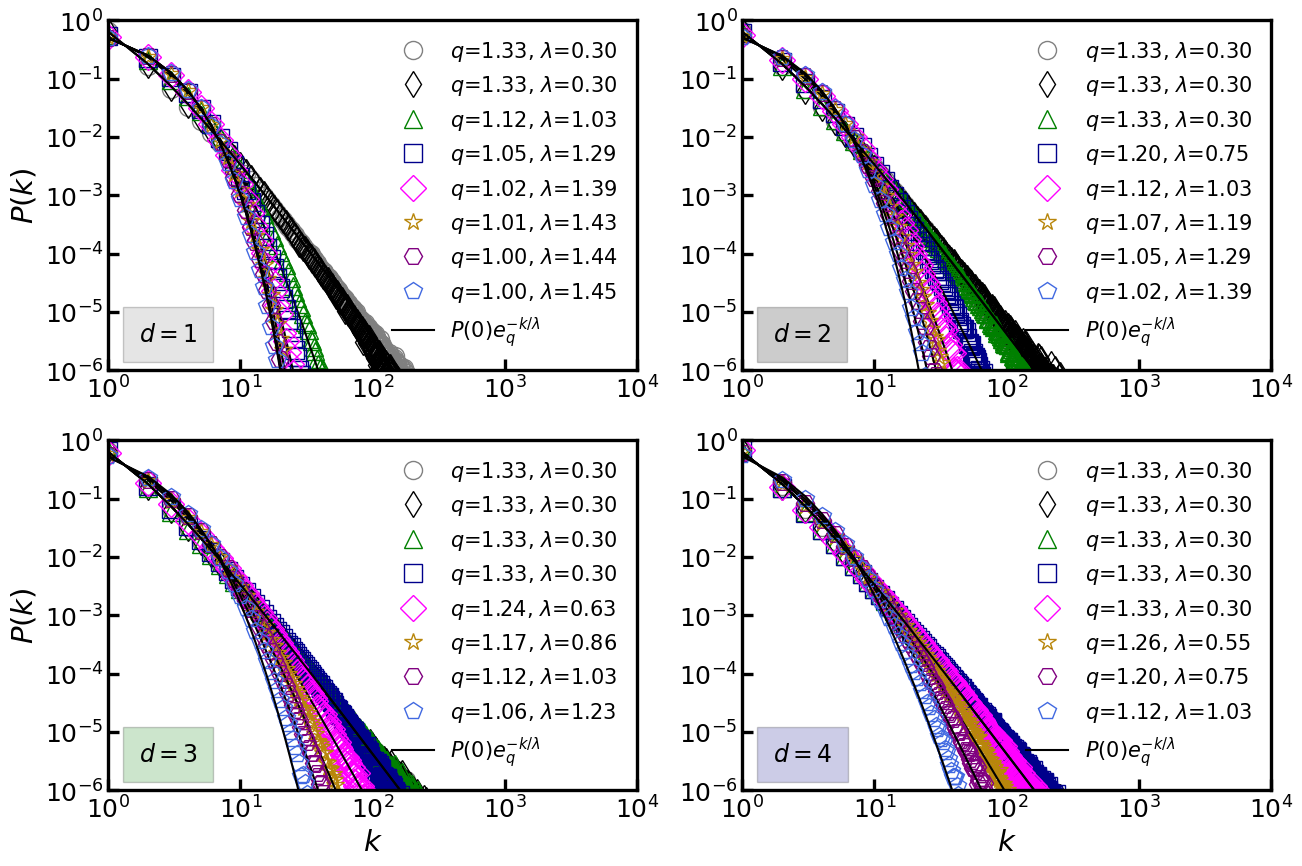

In [86]:
color = ["#808080","black",'#008000',"#00008B","magenta","darkgoldenrod","purple","royalblue"]
# label1d = [rf"$\lambda$ = {lambda_1d[i]:.2f}, q = {q1d[i]:.2f}" for i in range(len(lambda_1d))]
# label2d = [rf"$\lambda$ = {lambda_2d[i]:.2f}, q = {q2d[i]:.2f}" for i in range(len(lambda_1d))]
# label3d = [rf"$\lambda$ = {lambda_3d[i]:.2f}, q = {q3d[i]:.2f}" for i in range(len(lambda_1d))]
# label4d = [rf"$\lambda$ = {lambda_4d[i]:.2f}, q = {q4d[i]:.2f}" for i in range(len(lambda_1d))]

labels_1 = [rf"$q$={q(alpha_a_v[i],1):.2f}, $\lambda$={kappa(alpha_a_v[i],1):.2f}" for i in range(len(alpha_a_v))]
#labels_1 = [rf"$\alpha_a$={alpha_a_v[i]:.2f}" for i in range(len(alpha_a_v))]
labels_2 = [rf"$q$={q(alpha_a_v[i],2):.2f}, $\lambda$={kappa(alpha_a_v[i],2):.2f}" for i in range(len(alpha_a_v))]
labels_3 = [rf"$q$={q(alpha_a_v[i],3):.2f}, $\lambda$={kappa(alpha_a_v[i],3):.2f}" for i in range(len(alpha_a_v))]
labels_4 = [rf"$q$={q(alpha_a_v[i],4):.2f}, $\lambda$={kappa(alpha_a_v[i],4):.2f}" for i in range(len(alpha_a_v))]

markers = ["o","d","^","s","D","*","H","p"]
#markers = ["o","o","o","o","o"]
markersize = 13
fig, ax = plt.subplots(2, 2,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_g$', fontsize=20)
for i in range(len(alpha_a_v)):
     # Plot data
    ax[0, 0].plot(k_1d_a[i], pk_1d_a[i],markers[i],color=color[i],label=labels_1[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2d_a[i], pk_2d_a[i],markers[i],color=color[i],label=labels_2[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_3d_a[i], pk_3d_a[i],markers[i],color=color[i],label=labels_3[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_4d_a[i], pk_4d_a[i],markers[i],color=color[i],label=labels_4[i],markersize=markersize,markerfacecolor='none')
    if(i != 0.0):
        ax[0, 0].plot(k_1d_a[i], q_exp(k_1d_a[i], q(alpha_a_v[i], 1), kappa(alpha_a_v[i], 1)),color='k')
        ax[0, 1].plot(k_2d_a[i], q_exp(k_2d_a[i], q(alpha_a_v[i], 2), kappa(alpha_a_v[i], 2)),color='k')
        ax[1, 0].plot(k_3d_a[i], q_exp(k_3d_a[i], q(alpha_a_v[i], 3), kappa(alpha_a_v[i], 3)),color='k')
        ax[1, 1].plot(k_4d_a[i], q_exp(k_4d_a[i], q(alpha_a_v[i], 4), kappa(alpha_a_v[i], 4)),color='k')

ax[0, 0].plot(k_1d_a[0],q_exp(k_1d_a[0], q(alpha_a_v[0], 1), kappa(alpha_a_v[0], 1)), color='k', label = r"$P(0)e_q^{-k/\lambda}$")
ax[0, 1].plot(k_2d_a[0],q_exp(k_2d_a[0], q(alpha_a_v[0], 2), kappa(alpha_a_v[0], 2)), color='k', label = r"$P(0)e_q^{-k/\lambda}$")
ax[1, 0].plot(k_3d_a[0],q_exp(k_3d_a[0], q(alpha_a_v[0], 3), kappa(alpha_a_v[0], 3)), color='k', label = r"$P(0)e_q^{-k/\lambda}$")
ax[1, 1].plot(k_4d_a[0],q_exp(k_4d_a[0], q(alpha_a_v[0], 4), kappa(alpha_a_v[0], 4)), color='k', label = r"$P(0)e_q^{-k/\lambda}$")

#ax[0, 0].plot(k_1d_g[1],q_exp(k_1d_g[1], q(2.0, 1), kappa(2.0, 1)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")
#ax[0, 1].plot(k_2d_g[1],q_exp(k_2d_g[1], q(2.0, 2), kappa(2.0, 2)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")
#ax[1, 0].plot(k_3d_g[1],q_exp(k_3d_g[1], q(2.0, 3), kappa(2.0, 3)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")
#ax[1, 1].plot(k_4d_g[1],q_exp(k_4d_g[1], q(2.0, 4), kappa(2.0, 4)),color="k",label=r"$P(0)e_q^{-k/\lambda}$")

# Dimension Values
ax[0, 0].text(1.7, 10**(-5.5), f'$d = 1$', style="normal" ,fontsize=17, bbox={'facecolor': color[0], 'alpha': 0.2, 'pad': 11})
ax[0, 1].text(1.7, 10**(-5.5), f'$d = 2$', style="normal" ,fontsize=17, bbox={'facecolor': color[1], 'alpha': 0.2, 'pad': 11})
ax[1, 0].text(1.7, 10**(-5.5), f'$d = 3$', style="normal" ,fontsize=17, bbox={'facecolor': color[2], 'alpha': 0.2, 'pad': 11})
ax[1, 1].text(1.7, 10**(-5.5), f'$d = 4$', style="normal" ,fontsize=17, bbox={'facecolor': color[3], 'alpha': 0.2, 'pad': 11})

#ax[0, 0].text(230.5, 10**(-5.5), f'$q$ = {round(q(2.0, 1),2)}, $\lambda$ = {round(kappa(2.0, 1),2)}', style="normal" ,fontsize=16)
#ax[0, 1].text(230.5, 10**(-5.5), f'$q$ = {round(q(2.0, 2),2)}, $\lambda$ = {round(kappa(2.0, 2),2)}', style="normal" ,fontsize=16)
#ax[1, 0].text(230.5, 10**(-5.5), f'$q$ = {round(q(2.0, 3),2)}, $\lambda$ = {round(kappa(2.0, 3),2)}', style="normal" ,fontsize=16)
#ax[1, 1].text(230.5, 10**(-5.5), f'$q$ = {round(q(2.0, 4),2)}, $\lambda$ = {round(kappa(2.0, 4),2)}', style="normal" ,fontsize=16)

parts_of_graphic = ['top', 'bottom', 'left', 'right']

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        ax[i, j].legend(prop={"size":15},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(k)$",size=21)
        ax[1, j].set_xlabel(r"$k$",size=21)
        #ax[i, j].tick_params('both', labelsize=21)
        ax[i, j].xaxis.set_minor_locator(plt.NullLocator())
        ax[i, j].yaxis.set_minor_locator(plt.NullLocator())
        for k in parts_of_graphic:
            ax[i, j].spines[k].set_linewidth(thickness_axes)
        #ax[i,j].tick_params(which='minor', width=1.4,length=4,labelsize=18)
        ax[i,j].tick_params(which='major', width=thickness_axes,direction="in",length=8,labelsize=18)
#fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_a$', fontsize=30)
plt.savefig("../../results/distributions/alphaa.pdf",dpi=300)
plt.show()

NameError: name 'k_5a' is not defined

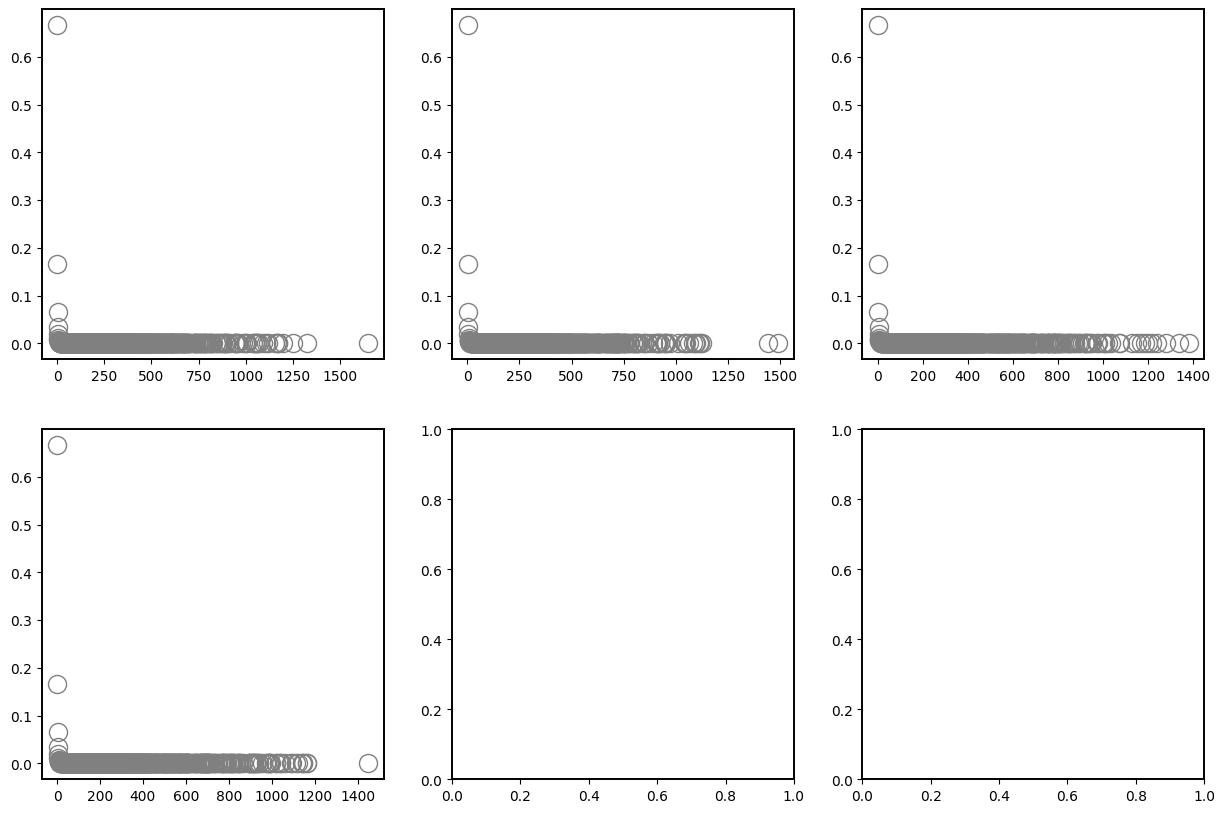

In [78]:
color = ["#808080","black",'#008000',"#00008B","orange"]
color_text = ["red","green","blue","yellow","cyan"]
# label1d = [rf"$\lambda$ = {lambda_1d[i]:.2f}, q = {q1d[i]:.2f}" for i in range(len(lambda_1d))]
# label2d = [rf"$\lambda$ = {lambda_2d[i]:.2f}, q = {q2d[i]:.2f}" for i in range(len(lambda_1d))]
# label3d = [rf"$\lambda$ = {lambda_3d[i]:.2f}, q = {q3d[i]:.2f}" for i in range(len(lambda_1d))]
# label4d = [rf"$\lambda$ = {lambda_4d[i]:.2f}, q = {q4d[i]:.2f}" for i in range(len(lambda_1d))]

labels = [rf"$d$ = {i+1}" for i in range(4)]

markers = ["o","v","s","^"]
markersize = 13
fig, ax = plt.subplots(2, 3,figsize=(15,10))
#fig.suptitle(r'Distribuição de graus da rede para múltiplos $\alpha_a$', fontsize=20)
for i in range(4):
     # Plot data
    ax[0, 0].plot(k_1a[i],pk_1a[i],markers[i],color=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0, 1].plot(k_2a[i],pk_2a[i],markers[i],color=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[0, 2].plot(k_3a[i],pk_3a[i],markers[i],color=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 0].plot(k_4a[i],pk_4a[i],markers[i],color=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 1].plot(k_5a[i],pk_5a[i],markers[i],color=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    ax[1, 2].plot(k_6a[i],pk_6a[i],markers[i],color=color[i],label=labels[i],markersize=markersize,markerfacecolor='none')
    

# Dimension Values
ax[0, 0].text(10**(2.85), 10**(-5.5), r'$\alpha_a$=0.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
ax[0, 1].text(10**(2.85), 10**(-5.5), r'$\alpha_a$=2.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
ax[0, 2].text(10**(2.85), 10**(-5.5), r'$\alpha_a$=3.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
ax[1, 0].text(10**(2.85), 10**(-5.5), r'$\alpha_a$=5.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
ax[1, 1].text(10**(2.85), 10**(-5.5), r'$\alpha_a$=6.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
ax[1, 2].text(10**(2.85), 10**(-5.5), r'$\alpha_a$=8.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
#ax[1, 2].text(1.5, 10**(-5.5), r'$\alpha_a$=8.0', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
# ax[0, 1].text(1.5, 10**(-5.5), 'd=2', style="normal" ,fontsize=16, bbox={'facecolor': color[1], 'alpha': 0.1, 'pad': 10})
# ax[1, 0].text(1.5, 10**(-5.5), 'd=3', style="normal" ,fontsize=16, bbox={'facecolor': color[2], 'alpha': 0.1, 'pad': 10})
# ax[1, 1].text(1.5, 10**(-5.5), 'd=4', style="normal" ,fontsize=16, bbox={'facecolor': color[3], 'alpha': 0.1, 'pad': 10})
for i in range(2):
    for j in range(3):
        ax[i, j].set_xlim([1,10**4])
        ax[i, j].set_ylim([10**(-6),1])
        
        ax[i, j].set_yscale('log')
        ax[i, j].set_xscale('log')
        ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$P(k)$",size=20)
        ax[1, j].set_xlabel(r"$k$",size=20)
        #ax[i, j].tick_params('both', labelsize=21)
        ax[i, j].tick_params(which='minor', width=1.4, length=4,labelsize=13)
        ax[i, j].tick_params(which='major', width=1.4, length=8,labelsize=13)
        # ax[i, j].xaxis.set_minor_locator(MultipleLocator(.125))
        # ax[i, j].yaxis.set_minor_locator(MultipleLocator(.5))
fig.suptitle(r'Distribuição de graus para múltiplos $\alpha_a$', fontsize=30)
#plt.savefig("../../results/aa.pdf",dpi=300)
plt.show()

In [ ]:
k_1d_lin, lnq_1d_lin = [[] for _ in range(len(alpha_a1D))],[[] for _ in range(len(alpha_a1D))]
k_2d_lin, lnq_2d_lin = [[] for _ in range(len(alpha_a1D))],[[] for _ in range(len(alpha_a1D))]
k_3d_lin, lnq_3d_lin = [[] for _ in range(len(alpha_a1D))],[[] for _ in range(len(alpha_a1D))]
k_4d_lin, lnq_4d_lin = [[] for _ in range(len(alpha_a1D))],[[] for _ in range(len(alpha_a1D))]

alpha_a1d = [0.0, 1.0, 1.5, 2.0, 3.0]
alpha_a2d = [0.0, 2.0, 2.5, 3.0, 5.0]
alpha_a3d = [0.0, 3.0, 3.5, 4.0, 5.0]
alpha_a4d = [0.0, 4.0, 5.0, 6.0, 8.0]

q1d = [1.333,1.305,1.200,1.125,1.059]
q2d = [1.333,1.305,1.235,1.184,1.090]
q3d = [1.333,1.315,1.270,1.215,1.158]
q4d = [1.333,1.324,1.273,1.210,1.140]

eta1d =[.3, .38, .75, 1.1, 1.30]
eta2d =[.3, .36, .66, .85, 1.21]
eta3d =[.3, .33, .49, .75,.95]
eta4d =[.3, .31, .55, .78, 1.01]

In [ ]:
for i in range(len(q1d)):
    degree1d = degree(10**5, 1, alpha_a1d[i], 2.0)
    degree2d = degree(10**5, 2, alpha_a2d[i], 2.0)
    degree3d = degree(10**5, 3, alpha_a3d[i], 2.0)
    degree4d = degree(10**5, 4, alpha_a4d[i], 2.0)
    
    k_1d_lin1,pk1 = distribution(degree1d)
    k_2d_lin1,pk2 = distribution(degree2d)
    k_3d_lin1,pk3 = distribution(degree3d)
    k_4d_lin1,pk4 = distribution(degree4d)

    df_1d = pd.DataFrame(data={"k":k_1d_lin1,"pk":pk1})
    df_2d = pd.DataFrame(data={"k":k_2d_lin1,"pk":pk2})
    df_3d = pd.DataFrame(data={"k":k_3d_lin1,"pk":pk3})
    df_4d = pd.DataFrame(data={"k":k_4d_lin1,"pk":pk4})

    df_1d.to_csv(f"../../data/N_{N}_distributions/dim_{1}_alpha_a_{alpha_a1d[i]}_alpha_g_{2.0}.csv",index=False)
    df_2d.to_csv(f"../../data/N_{N}_distributions/dim_{2}_alpha_a_{alpha_a2d[i]}_alpha_g_{2.0}.csv",index=False)
    df_3d.to_csv(f"../../data/N_{N}_distributions/dim_{3}_alpha_a_{alpha_a3d[i]}_alpha_g_{2.0}.csv",index=False)
    df_4d.to_csv(f"../../data/N_{N}_distributions/dim_{4}_alpha_a_{alpha_a4d[i]}_alpha_g_{2.0}.csv",index=False)

    # lnq_1d_lin[i] = ln_q_k(k_1d_lin[i],q1d[i],eta1d[i])
    # lnq_2d_lin[i] = ln_q_k(k_2d_lin[i],q2d[i],eta2d[i])
    # lnq_3d_lin[i] = ln_q_k(k_3d_lin[i],q3d[i],eta3d[i])
    # lnq_4d_lin[i] = ln_q_k(k_4d_lin[i],q4d[i],eta4d[i])
    

In [ ]:
# for i in range(len(alpha_a1D)):
#     path_lin_1d = f"../../data/N_{N}/distributions/linear/ln_q/numerico/d{1}_alphaA{alpha_a1D[i]}_alphaG{alpha_g}.csv"
#     path_lin_2d = f"../../data/N_{N}/distributions/linear/ln_q/numerico/d{2}_alphaA{alpha_a2D[i]}_alphaG{alpha_g}.csv"
#     path_lin_3d = f"../../data/N_{N}/distributions/linear/ln_q/numerico/d{3}_alphaA{alpha_a3D[i]}_alphaG{alpha_g}.csv"
#     path_lin_4d = f"../../data/N_{N}/distributions/linear/ln_q/numerico/d{4}_alphaA{alpha_a4D[i]}_alphaG{alpha_g}.csv"
    
#     k_1d_lin[i], lnq_1d_lin[i] = pd.read_csv(path_lin_1d)["k"].values, pd.read_csv(path_lin_1d)["pk"].values
#     k_2d_lin[i], lnq_2d_lin[i] = pd.read_csv(path_lin_2d)["k"].values, pd.read_csv(path_lin_2d)["pk"].values
#     k_3d_lin[i], lnq_3d_lin[i] = pd.read_csv(path_lin_3d)["k"].values, pd.read_csv(path_lin_3d)["pk"].values
#     k_4d_lin[i], lnq_4d_lin[i] = pd.read_csv(path_lin_4d)["k"].values, pd.read_csv(path_lin_4d)["pk"].values

In [ ]:
a_1d = [[] for _ in range(len(alpha_a1D))]
a_2d = [[] for _ in range(len(alpha_a1D))]
a_3d = [[] for _ in range(len(alpha_a1D))]
a_4d = [[] for _ in range(len(alpha_a1D))]

b_1d = [[] for _ in range(len(alpha_a1D))]
b_2d = [[] for _ in range(len(alpha_a1D))]
b_3d = [[] for _ in range(len(alpha_a1D))]
b_4d = [[] for _ in range(len(alpha_a1D))]

err_a_1d = [[] for _ in range(len(alpha_a1D))]
err_a_2d = [[] for _ in range(len(alpha_a1D))]
err_a_3d = [[] for _ in range(len(alpha_a1D))]
err_a_4d = [[] for _ in range(len(alpha_a1D))]

err_b_1d = [[] for _ in range(len(alpha_a1D))]
err_b_2d = [[] for _ in range(len(alpha_a1D))]
err_b_3d = [[] for _ in range(len(alpha_a1D))]
err_b_4d = [[] for _ in range(len(alpha_a1D))]

In [ ]:
s1 = 30
s2 = 30
s3 = 40
s4 = 40

for i in range(len(alpha_a1D)):
#     if(i==1):
#         s3 = 
    a_1d[i],err_a_1d[i],b_1d[i],err_b_1d[i] = linear_regression(k_1d_lin[i], lnq_1d_lin[i],s1,100)
    a_2d[i],err_a_2d[i],b_2d[i],err_b_2d[i] = linear_regression(k_2d_lin[i], lnq_2d_lin[i],s2,100)
    a_3d[i],err_a_3d[i],b_3d[i],err_b_3d[i] = linear_regression(k_3d_lin[i], lnq_3d_lin[i],s3,100)
    a_4d[i],err_a_4d[i],b_4d[i],err_b_4d[i] = linear_regression(k_4d_lin[i], lnq_4d_lin[i],s4,100)

In [ ]:
def linear_plot(a, b, k,num_value):
    return a*k[:num_value]+b

In [ ]:
linear_regression1d = [[] for _ in range(len(alpha_a1D))]
linear_regression2d = [[] for _ in range(len(alpha_a1D))]
linear_regression3d = [[] for _ in range(len(alpha_a1D))]
linear_regression4d = [[] for _ in range(len(alpha_a1D))]

In [ ]:
for i in range(len(alpha_a1D)):
    linear_regression1d[i] = linear_plot(a_1d[i],b_1d[i],k_1d_lin[i],s1)
    linear_regression2d[i] = linear_plot(a_2d[i],b_2d[i],k_2d_lin[i],s2)
    linear_regression3d[i] = linear_plot(a_3d[i],b_3d[i],k_3d_lin[i],s3)
    linear_regression4d[i] = linear_plot(a_4d[i],b_4d[i],k_4d_lin[i],s4)

In [ ]:
lambda_1d = [abs(i) for i in a_1d]
lambda_2d = [abs(i) for i in a_2d]
lambda_3d = [abs(i) for i in a_3d]
lambda_4d = [abs(i) for i in a_4d]

q1d = [q(i,1) for i in alpha_a1D]
q2d = [q(i,1) for i in alpha_a2D]
q3d = [q(i,1) for i in alpha_a3D]
q4d = [q(i,1) for i in alpha_a4D]

kappa_1d = [1/abs(i) for i in a_1d]
kappa_2d = [1/abs(i) for i in a_2d]
kappa_3d = [1/abs(i) for i in a_3d]
kappa_4d = [1/abs(i) for i in a_4d]

In [ ]:
values = [f""]
print(alpha_a4D)
print([f"{q4d[i]:.3f}" for i in range(len(q4d))])
print([f"{kappa_4d[i]:.3f}" for i in range(len(kappa_4d))])

In [ ]:
color = ["#808080","darkgoldenrod",'#008000',"#00008B","magenta"]

# label1d = [rf"$\alpha_a$={alpha_a1D[i]:.1f}" for i in range(len(alpha_a1D))]
# label2d = [rf"$\alpha_a$={alpha_a2D[i]:.1f}" for i in range(len(alpha_a1D))]
# label3d = [rf"$\alpha_a$ = {alpha_a3D[i]:.1f}" for i in range(len(alpha_a1D))]
# label4d = [rf"$\alpha_a$ = {alpha_a4D[i]:.1f}" for i in range(len(alpha_a1D))]


label1d = [rf"$\alpha_a$={alpha_a1D[i]:.1f},$q$={q1d[i]:.2f}" for i in range(len(alpha_a1D))]
label2d = [rf"$\alpha_a$={alpha_a2D[i]:.1f},$q$={q2d[i]:.2f}" for i in range(len(alpha_a1D))]
label3d = [rf"$\alpha_a$={alpha_a3D[i]:.1f},$q$={q3d[i]:.2f}" for i in range(len(alpha_a1D))]
label4d = [rf"$\alpha_a$={alpha_a4D[i]:.1f},$q$={q4d[i]:.2f}" for i in range(len(alpha_a1D))]

# label1d = [rf"$\alpha_a$={alpha_a1D[i]:.1f},$\kappa$={kappa_1d[i]:.2f},$q$={q1d[i]:.2f}" for i in range(len(alpha_a1D))]
# label2d = [rf"$\alpha_a$={alpha_a2D[i]:.1f},$\kappa$={kappa_2d[i]:.2f},$q$={q2d[i]:.2f}" for i in range(len(alpha_a1D))]
# label3d = [rf"$\alpha_a$={alpha_a3D[i]:.1f},$\kappa$={kappa_3d[i]:.2f},$q$={q3d[i]:.2f}" for i in range(len(alpha_a1D))]
# label4d = [rf"$\alpha_a$={alpha_a4D[i]:.1f},$\kappa$={kappa_4d[i]:.2f},$q$={q4d[i]:.2f}" for i in range(len(alpha_a1D))]

markers = ["o","v","d","^","s"]
#markers = ["o","o","o","o","o"]
markersize = 12
fig, ax = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle('Distribuição de graus da rede', fontsize=20)
for i in range(len(alpha_a1D)):
     # Plot data
    plt1 = ax[0, 0].plot(k_1d_lin[i],lnq_1d_lin[i],markers[i],color=color[i],label=label1d[i],markersize=markersize,markerfacecolor='none')
    plt2 = ax[0, 1].plot(k_2d_lin[i],lnq_2d_lin[i],markers[i],color=color[i],label=label2d[i],markersize=markersize,markerfacecolor='none')
    plt3 = ax[1, 0].plot(k_3d_lin[i],lnq_3d_lin[i],markers[i],color=color[i],label=label3d[i],markersize=markersize,markerfacecolor='none')
    plt4 = ax[1, 1].plot(k_4d_lin[i],lnq_4d_lin[i],markers[i],color=color[i],label=label4d[i],markersize=markersize,markerfacecolor='none')
    
    # Linear Regression
    ax[0, 0].plot(k_1d_lin[i][:s1], linear_regression1d[i],color='k',linewidth=2)
    ax[0, 1].plot(k_2d_lin[i][:s2], linear_regression2d[i],color='k',linewidth=2)
    ax[1, 0].plot(k_3d_lin[i][:s3], linear_regression3d[i],color='k',linewidth=2)
    ax[1, 1].plot(k_4d_lin[i][:s4], linear_regression4d[i],color='k',linewidth=2)
    

# Dimension Values
ax[0, 0].text(4, -93, f'$d$ = 1', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
ax[0, 1].text(4, -93, f'$d$ = 2', style="normal" ,fontsize=16, bbox={'facecolor': color[1], 'alpha': 0.1, 'pad': 10})
ax[1, 0].text(4, -93, f'$d$ = 3', style="normal" ,fontsize=16, bbox={'facecolor': color[2], 'alpha': 0.1, 'pad': 10})
ax[1, 1].text(4, -93, f'$d$ = 4', style="normal" ,fontsize=16, bbox={'facecolor': color[3], 'alpha': 0.1, 'pad': 10})

# ax[0, 0].text(4, -140, f'$d$ = 1', style="normal" ,fontsize=16, bbox={'facecolor': color[0], 'alpha': 0.1, 'pad': 10})
# ax[0, 1].text(4, -140, f'$d$ = 2', style="normal" ,fontsize=16, bbox={'facecolor': color[1], 'alpha': 0.1, 'pad': 10})
# ax[1, 0].text(4, -140, f'$d$ = 3', style="normal" ,fontsize=16, bbox={'facecolor': color[2], 'alpha': 0.1, 'pad': 10})
# ax[1, 1].text(4, -140, f'$d$ = 4', style="normal" ,fontsize=16, bbox={'facecolor': color[3], 'alpha': 0.1, 'pad': 10})


for i in range(2):
    for j in range(2):
        ax[i, j].set_xlim([0,100])
        ax[i, j].set_ylim([-100,0])
        # ax[i, j].set_xlim([0,150])
        # ax[i, j].set_ylim([-150,0])
        
        #ax[i, j].set_yscale('log')
        #ax[i, j].set_xscale('log')
        ax[i, j].legend(prop={"size":16},fancybox=True,framealpha=0.0)
        ax[i, 0].set_ylabel(r"$\ln_q[P(k)/P(0)]$",size=21)
        ax[1, j].set_xlabel(r"$k$",size=21)
        ax[i, j].xaxis.set_minor_locator(MultipleLocator(10))
        ax[i, j].yaxis.set_minor_locator(MultipleLocator(10))
        # ax[i, j].xaxis.set_minor_locator(MultipleLocator(12.5))
        # ax[i, j].yaxis.set_minor_locator(MultipleLocator(12.5))
        ax[i, j].tick_params(which='minor', width=1.4, length=4,labelsize=20)
        ax[i, j].tick_params(which='major', width=1.4, length=8,labelsize=20)
        #ax[i, j].tick_params('both', labelsize=22)
plt.savefig("../../results/distributions_dissert_1.pdf",dpi=300)
plt.show()